In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#read in data
data = pd.read_csv("averydata.csv")

In [3]:
data

,Your Name,Grid Resolution (No. of FV),Re_throat,Mass-Flux @ Nozzle Exit [kg/s],Area Weighted Average Mach_Exit,Thrust [N],Isp [s],Isp_Efficiency [%],Area Weighted Average Knudsen_Exit
0,Louisos,190200,430000,3.24,3.78,9859.0,311,92.0,0.001130
1,Avery Clotfelter,141900,473000,3.19,3.97,10291.0,329,65.4,0.000358
2,Carson Barbour,233000,400000,2.23,2.58,9431.1,289,68.2,0.001013
3,Dan Wells,105000,5350000,38.20,4.23,110673.9,295,80.4,0.000070
4,Gabriel Mailhot,83510,421000,83.96,0.91,68997.2,84,16.6,0.000034
5,Jon Watzka,17240,6670,3.49,1.42,1742.0,51,88.0,16.000000
6,khaoula chougag,10500,41700,0.27,3.71,791.1,301,59.8,0.000031
7,Mark O'Connor,96250,427000,3.33,3.83,12628.0,387,74.7,0.001210
8,Matt Zapata,190200,5430000,433.70,4.64,489391.8,115,0.0,0.000009
9,Nate Goldman,5000,26000000000,7263.00,5.60,243947.8,3,82.0,0.040000


In [4]:
#drop string/irrelevant columns and store in new df
data_pca2 = data.drop(["Your Name", "Grid Resolution (No. of FV)"], axis=1)
data

,Your Name,Grid Resolution (No. of FV),Re_throat,Mass-Flux @ Nozzle Exit [kg/s],Area Weighted Average Mach_Exit,Thrust [N],Isp [s],Isp_Efficiency [%],Area Weighted Average Knudsen_Exit
0,Louisos,190200,430000,3.24,3.78,9859.0,311,92.0,0.001130
1,Avery Clotfelter,141900,473000,3.19,3.97,10291.0,329,65.4,0.000358
2,Carson Barbour,233000,400000,2.23,2.58,9431.1,289,68.2,0.001013
3,Dan Wells,105000,5350000,38.20,4.23,110673.9,295,80.4,0.000070
4,Gabriel Mailhot,83510,421000,83.96,0.91,68997.2,84,16.6,0.000034
5,Jon Watzka,17240,6670,3.49,1.42,1742.0,51,88.0,16.000000
6,khaoula chougag,10500,41700,0.27,3.71,791.1,301,59.8,0.000031
7,Mark O'Connor,96250,427000,3.33,3.83,12628.0,387,74.7,0.001210
8,Matt Zapata,190200,5430000,433.70,4.64,489391.8,115,0.0,0.000009
9,Nate Goldman,5000,26000000000,7263.00,5.60,243947.8,3,82.0,0.040000


In [5]:
#standardize data
std = pd.DataFrame(StandardScaler().fit_transform(data_pca2))

In [6]:
#run PCA with two PCs
pca = PCA(n_components = 2)
data_pca2 = pca.fit_transform(std)
data_pca2 = pd.DataFrame(data_pca2, columns=['PC1', 'PC2'])

In [7]:
data["PC1"] = data_pca2["PC1"]
data["PC2"] = data_pca2["PC2"]

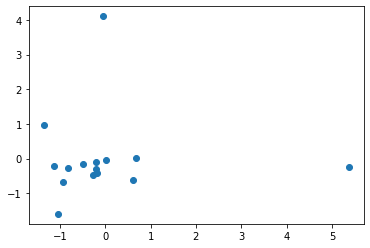

In [8]:
#plot two PCs, maybe do more with that later
plt.scatter(data["PC1"], data["PC2"])

In [9]:
data["Your Name"]

0               Louisos
1      Avery Clotfelter
2        Carson Barbour
3             Dan Wells
4       Gabriel Mailhot
5            Jon Watzka
6       khaoula chougag
7         Mark O'Connor
8           Matt Zapata
9          Nate Goldman
10          Nolan Hogan
11        Patrick Frank
12          Patrick Man
13          Ricky Caron
14    Thomas Tousignant
Name: Your Name, dtype: object

In [10]:
#absolute value of data
std = std.abs()

In [11]:
#append name column again
std["Names"] = data["Your Name"]

In [12]:
std

,0,1,2,3,4,5,6,Names
0,0.270095,0.292509,0.463240,0.612081,0.272292,0.450544,0.268662,Louisos
1,0.270089,0.292537,0.568354,0.609814,0.271073,0.031702,0.268855,Avery Clotfelter
2,0.270100,0.293070,0.200639,0.614327,0.273782,0.075791,0.268691,Carson Barbour
3,0.269336,0.273115,0.712194,0.082932,0.273376,0.267891,0.268927,Dan Wells
4,0.270097,0.247728,1.124536,0.301681,0.287667,0.736701,0.268936,Gabriel Mailhot
5,0.270161,0.292371,0.842388,0.654685,0.289902,0.387560,3.741630,Jon Watzka
6,0.270155,0.294157,0.424513,0.659676,0.272969,0.056475,0.268937,khaoula chougag
7,0.270096,0.292460,0.490901,0.597547,0.267144,0.178139,0.268642,Mark O'Connor
8,0.269324,0.053701,0.939019,1.904852,0.285567,0.998084,0.268943,Matt Zapata
9,3.741486,3.735022,1.470122,0.616586,0.293153,0.293085,0.258919,Nate Goldman


In [13]:
#build sum column of all features
std["sum"] = std.sum(axis = 1)

In [14]:
std

,0,1,2,3,4,5,6,Names,sum
0,0.270095,0.292509,0.463240,0.612081,0.272292,0.450544,0.268662,Louisos,2.629424
1,0.270089,0.292537,0.568354,0.609814,0.271073,0.031702,0.268855,Avery Clotfelter,2.312423
2,0.270100,0.293070,0.200639,0.614327,0.273782,0.075791,0.268691,Carson Barbour,1.996399
3,0.269336,0.273115,0.712194,0.082932,0.273376,0.267891,0.268927,Dan Wells,2.147771
4,0.270097,0.247728,1.124536,0.301681,0.287667,0.736701,0.268936,Gabriel Mailhot,3.237346
5,0.270161,0.292371,0.842388,0.654685,0.289902,0.387560,3.741630,Jon Watzka,6.478697
6,0.270155,0.294157,0.424513,0.659676,0.272969,0.056475,0.268937,khaoula chougag,2.246884
7,0.270096,0.292460,0.490901,0.597547,0.267144,0.178139,0.268642,Mark O'Connor,2.364929
8,0.269324,0.053701,0.939019,1.904852,0.285567,0.998084,0.268943,Matt Zapata,4.719490
9,3.741486,3.735022,1.470122,0.616586,0.293153,0.293085,0.258919,Nate Goldman,10.408373


In [15]:
#build distance from Louisos column
std["distance from Louisos"] = np.abs(std["sum"] - 2.629424)

In [16]:
#sort values by that distance
std = std.sort_values(by = ["distance from Louisos"])

<BarContainer object of 15 artists>

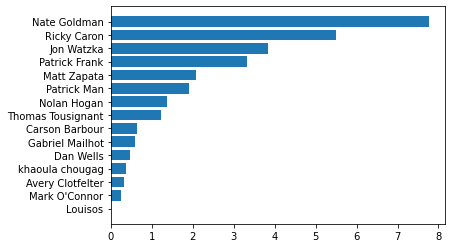

In [17]:
#plot that in horizontal bar
plt.barh(std["Names"], std["distance from Louisos"])